# Introduction générale
Construire un produit IA pour améliorer l'engagement et la rétention des employés

## Objectif d’apprentissage
* Construire un modèle de classification utilisant Pycaret
* Comprendre comment interpréter les résultats de l'algorithme

## Domaines d’application

## Votre mission

## Prérequis
* Environnement de développment (voir le Module 0)
* Comprendre (à haut niveau) les modèles de regression. Voir les ressoures ci-desous.

## Ressources

### pyCaret
* [La documentation offcielle](https://pycaret.readthedocs.io/en/latest)

### Classification

# Module 0 : Mise en place de l'environnement

## Création d'un environnement (anaconda)

Ouvrir Anaconda Propmp et exécuter ces deux commandes:

conda create --name myenv python=3.6

conda activate myenv

## Installation des librairies


In [ ]:
# pip install pycaret==2.1

## Import des librairies


In [2]:
from pycaret.datasets import get_data
from pycaret.classification import *
import pandas_profiling

# Module 1 : Compréhension du métier

## Vue d’ensemble du projet
Quel est le problème de l'industrie que vous essayez de résoudre? 
Comment votre solution sera-t-elle utilisée? Est-ce qu’il y a une solution actuellement en place ?
Pourquoi utiliser ML / AI pour résoudre cette tâche? 
Soyez aussi précis que possible lorsque vous décrivez comment le ML / AI peut apporter de la valeur.

## « Business Case »
Pourquoi est-ce un problème important à résoudre? 
Justifiez la construction de ce produit en termes d'impact sur les revenus récurrents, la part de marché, la satisfaction des clients et / ou d'autres facteurs de réussite commerciale.

## Application de ML / AI 
Quelle tâche précise utiliserez-vous ML / AI pour accomplir? 
Quel résultat ou objectif d’affaires cherchez-vous à atteindre?

Existe-t-il des problèmes comparables? Pouvez-vous réutiliser l'expérience ou les outils? 
L'expertise humaine est-elle disponible? Comment résoudriez-vous le problème manuellement?
Énumérez les hypothèses que vous (ou d'autres) avez faites jusqu'à présent. Vérifiez les hypothèses si possibles.

## Leviers

## Mesures de succès
Quelles mesures d’affaires appliquerez-vous pour déterminer le succès de votre produit? Est-ce que ces mesures sont alignées avec les objectifs d’affaire.
Les bonnes métriques sont clairement définies et facilement mesurables. Spécifiez comment vous allez établir une valeur de référence pour fournir un point de comparaison.

## Ressources

# Module 2 : Données

## Acquisition des données
D'où allez-vous vous procurer vos données? 
Quel est le coût d'acquisition de ces données? 
Y a-t-il des problèmes d'identification personnelle (PII) ou de sensibilité des données que vous devrez surmonter? Les données seront-elles disponibles sur une base continue ou allez-vous acquérir un grand lot de données qui devront être actualisées?

## Source des données
Convertissez les données dans un format que vous pouvez facilement manipuler (sans modifier les données elles-mêmes).
Assurez-vous que les informations sensibles sont supprimées ou protégées (par exemple, anonymisées). 
Vérifiez la taille et le type de données (séries chronologiques, échantillon, géographique, etc.). 
Quels biais sont intégrés aux données et comment les améliorer?
Échantillonnez un ensemble de test, mettez-le de côté et ne le regardez jamais (pas de data snooping!).

## Choix des étiquettes de données 
Quelles étiquettes avez-vous décidé d'ajouter à vos données? Et pourquoi avez-vous choisi ces étiquettes par rapport à toute autre option?



In [3]:
dataset = get_data('employee')
#dataset = get_data('credit',profile=True)

#pour avoir la liste des data dans la libraireu pyCaret: get_data('index')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [4]:
dataset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [5]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

## Exploration des données
Essayez d'obtenir le maximum d’input des experts du domaine
Créez une copie des données pour l'exploration (en l'échantillonnant jusqu'à une taille gérable si nécessaire). 
Étudiez chaque attribut et ses caractéristiques.
* Type
* % de la valeurs manquantes
* Bruit et type de bruit (stochastique, valeurs aberrantes, erreurs d'arrondi, etc.) 
* Distribution (gaussien, uniforme, logarithmique, etc.)

Pour les tâches d'apprentissage supervisé, identifiez les attributs cibles. 
Visualisez les données. 
Étudiez les corrélations entre les attributs. 
Étudiez la façon dont vous résoudriez le problème manuellement. 
Identifiez les transformations prometteuses que vous voudrez peut-être appliquer.
Identifiez les données supplémentaires qui seraient utiles 
Documentez ce que vous avez appris.


In [6]:
pandas_profiling.ProfileReport(data)


Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


## Préparation des données
### Remarques générales: 
* Travaillez sur des copies des données (conservez l'ensemble de données d'origine intact). 
* Écrire des fonctions pour toutes les transformations de données que vous appliquez, pour cinq raisons:
* Vous pouvez facilement préparer les données la prochaine fois que vous obtenez un nouvel ensemble de données 
* Vous pouvez appliquer ces transformations dans de futurs projets 
* Pour nettoyer et préparer l'ensemble de test 
* Pour nettoyer et préparer de nouvelles instances de données une fois que votre solution est en production 
* Pour faciliter le traitement de vos choix de préparation comme des hyperparamètres

### Nettoyage des données: 
* Corrigez ou supprimez les valeurs aberrantes (facultatif). 
* Remplacer les valeurs manquantes (par exemple, avec zéro, moyenne, médiane, imputation) ou supprimez leurs lignes (ou colonnes).

### Sélection des variables (facultatif): 
Supprimer les attributs qui ne fournissent aucune information utile pour la tâche. 

### Ingénierie des variables (feature engineering)
Le cas échéant: 
* Discrétiser les variables continues.
* Décomposer des attributs (par exemple, catégoriques, date / heure, etc.). 
* Ajoutez des transformations prometteuses de variables (par exemple, log (x), sqrt (x), x ^ 2, etc.). 
* Agréger les attributs en de nouvelles variables prometteuses. 

### Mise à l'échelle des variables
Standardiser ou normaliser les variables.






In [7]:
mySetup = setup(data=data,
                target= 'left', #'TARGET VARIABLE',  # TODO
                session_id=123,

                # train_size=0.7 
                # sampling=True, sample_estimator=None,
                # categorical_features=None, categorical_imputation='constant',
                # ordinal_features=None,
                # high_cardinality_features=None, high_cardinality_method='frequency',
                numeric_features=['number_project','time_spend_company']
                # numeric_imputation='mean',
                # date_features=None,
                # ignore_features=None, 
                # normalize=False, normalize_method='zscore', 
                # transformation=False, transformation_method='yeo-johnson', 
                # handle_unknown_categorical=True, unknown_categorical_method='least_frequent', 
                # pca=False, pca_method='linear', pca_components=None, 
                # ignore_low_variance=False, 
                # combine_rare_levels=False, rare_level_threshold=0.1, 
                # bin_numeric_features=None, 
                # remove_outliers=False, outliers_threshold=0.05, 
                # remove_multicollinearity=False, multicollinearity_threshold=0.9,    
                # remove_perfect_collinearity=False, create_clusters=False, cluster_iter=20, 
                # polynomial_features=False, polynomial_degree=2, 
                # trigonometry_features=False, 
                # polynomial_threshold=0.1, 
                # group_features=None, group_names=None, 
                # feature_selection=False, 
                # feature_selection_threshold=0.8, 
                # feature_interaction=False, 
                # feature_ratio=False, 
                # interaction_threshold=0.01, 
                # fix_imbalance=False, fix_imbalance_method=None, 
                # data_split_shuffle=True, folds_shuffle=False, 
                # n_jobs=- 1, 
                # html=True, 
                # log_experiment=False,
                # experiment_name=None, 
                # log_plots=False, 
                # log_profile=False, 
                # log_data=False, 
                # silent=False, 
                # verbose=True, 
                # profile=False 
               )

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(14249, 10)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Ressources
* [Pandas_Profiling](https://github.com/pandas-profiling/pandas-profiling)
* [Framework for Data Preparation Techniques in Machine Learning](https://machinelearningmastery.com/framework-for-data-preparation-for-machine-learning/)

# Module 3 : Modèle/Analyse

## Ressources pour le produit/modèle
Comment allez-vous établir les ressources dont vous avez besoin?
Allez-vous sous-traiter la création et / ou l'hébergement de modèles à une plate-forme externe, ou allez-vous construire le modèle en utilisant une équipe interne, et pourquoi?

## Construction du modèle
### Remarques
* Si les données sont énormes, vous voudrez peut-être échantillonner des ensembles d'entraînement plus petits afin de pouvoir former de nombreux modèles différents dans un délai raisonnable (sachez que cela pénalise les modèles complexes tels que les grands réseaux de neurones ou les forêts aléatoires). • 
* Encore une fois, essayez d'automatiser autant que possible ces étapes.

### Modèles de base
Entrainer de nombreux modèles de bases rapides et de différentes catégories (par exemple, Bayes linéaires, naïfs, SVM, Forêts aléatoires, réseau neuronal, etc.) en utilisant des paramètres standard. 

### Mesurez et comparez leurs performances.
Pour chaque modèle, utilisez la validation croisée N fois et calculez la moyenne et l'écart type de la mesure de performance sur les N plis (folds). 

### Importance des variables
Analysez les variables les plus significatives pour chaque algorithme. 

### Analyse des erreurs
* Analysez les types d'erreurs que les modèles font.
* Quelles données un humain aurait-il utilisées pour éviter ces erreurs? 

### Sélection et ingénierie des variables
Faites un tour rapide de la sélection et de l'ingénierie des variables.

### Itération
Faites une ou deux itérations rapides supplémentaires des cinq étapes précédentes. 

### Présélection de modèles
Présélectionnez les trois à cinq modèles les plus prometteurs, préférant les modèles qui font différents types d'erreurs.


## 'Fine Tuning' du Systeme
### Remarques
* Vous souhaiterez utiliser autant de données que possible pour cette étape, surtout lorsque vous vous dirigez vers la fin du réglage
* Comme toujours, penser à automatisez ce que vous pouvez.

### Affinez les hyperparamètres
* Utiliser la validation croisée.
* Traitez vos choix de transformation de données comme des hyperparamètres, surtout lorsque vous n'êtes pas sûr d'eux (par exemple, dois-je remplacer les valeurs manquantes par zéro ou par la valeur médiane? Ou simplement supprimer les lignes?). 
* À moins qu'il n'y ait très peu de valeurs hyperparamétriques à explorer, préférez la recherche aléatoire à la recherche sur la grille. Si la formation est très longue, vous pouvez préférer une approche d'optimisation bayésienne) 

### Essayez les méthodes d'ensemble. 
La combinaison de vos meilleurs modèles fonctionnera souvent mieux que de les exécuter individuellement.

## Évaluation des résultats
Une fois que vous êtes sûr de votre modèle final, mesurez ses performances sur l'ensemble de test pour estimer l'erreur de généralisation.
Quelles mesures de performance du modèle sont appropriées pour mesurer son succès? Quel niveau de performance est requis?

## Interprétabilité et explicabilité

## Ressources
* [PyCaret](https://pycaret.org/)
* [Yellowbrick](https://www.scikit-yb.org/en/latest/index.html)
* [Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability)
* [PRACTICAL BAYESIAN OPTIMIZATION OF MACHINE LEARNING ALGORITHMS](https://arxiv.org/pdf/1206.2944.pdf)




## Construction du modèle


In [8]:
compare_models(exclude=None, 
               include=None, 
               fold = 10,  
               round = 4,  
               sort = 'Accuracy', 
               n_select = 1, 
               budget_time=0,
               turbo = True, 
               verbose = True
               )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.9861,0.9929,0.9569,0.9839,0.9702,0.9611,0.9613,0.5671
1,Light Gradient Boosting Machine,0.9860,0.9937,0.9518,0.9886,0.9698,0.9607,0.9610,0.2418
2,Random Forest Classifier,0.9847,0.9871,0.9446,0.9902,0.9669,0.9569,0.9574,0.1136
3,CatBoost Classifier,0.9828,0.9926,0.9421,0.9846,0.9628,0.9516,0.9520,11.1194
4,Extra Trees Classifier,0.9826,0.9900,0.9446,0.9812,0.9625,0.9512,0.9515,0.2821
5,Gradient Boosting Classifier,0.9752,0.9880,0.9285,0.9658,0.9467,0.9306,0.9310,1.0873
6,Decision Tree Classifier,0.9729,0.9674,0.9569,0.9310,0.9437,0.9259,0.9261,0.0367
7,Ada Boost Classifier,0.9561,0.9810,0.8994,0.9144,0.9066,0.8779,0.8781,0.3683
8,K Neighbors Classifier,0.9384,0.9699,0.9188,0.8379,0.8763,0.8355,0.8372,0.0689
9,Logistic Regression,0.7954,0.8156,0.3721,0.6135,0.4628,0.3457,0.3624,0.1349


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [9]:
bestModel = automl()

In [10]:
print(bestModel)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)


## 'Fine Tuning' du Systeme

In [11]:
## Affinez les hyperparamètres¶

tuned_bestModel = tune_model(bestModel)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9890,0.9944,0.9578,0.9956,0.9763,0.9692,0.9695
1,0.9890,0.9935,0.9620,0.9913,0.9764,0.9693,0.9694
2,0.9890,0.9926,0.9662,0.9871,0.9765,0.9693,0.9694
3,0.9880,0.9953,0.9662,0.9828,0.9745,0.9666,0.9667
4,0.9829,0.9905,0.9451,0.9825,0.9634,0.9523,0.9526
5,0.9900,0.9955,0.9703,0.9871,0.9786,0.9721,0.9721
6,0.9860,0.9857,0.9492,0.9912,0.9697,0.9606,0.9609
7,0.9900,0.9920,0.9703,0.9871,0.9786,0.9721,0.9721
8,0.9870,0.9906,0.9661,0.9785,0.9723,0.9638,0.9638
9,0.9870,0.9911,0.9576,0.9869,0.9720,0.9635,0.9637


In [12]:
print(tuned_bestModel)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.16, max_delta_step=0, max_depth=110,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=0)


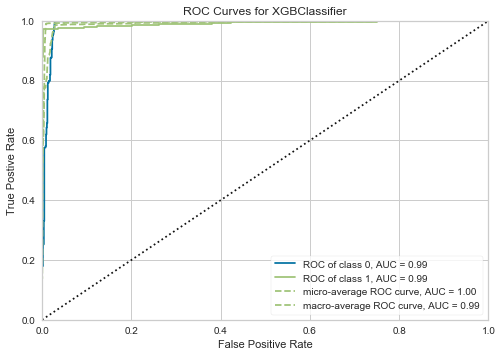

In [13]:
plot_model(tuned_bestModel,plot='auc')

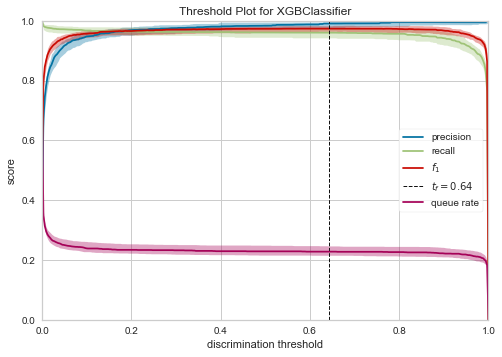

In [14]:
plot_model(tuned_bestModel,plot='threshold')

In [ ]:
plot_model(tuned_bestModel,plot='pr')

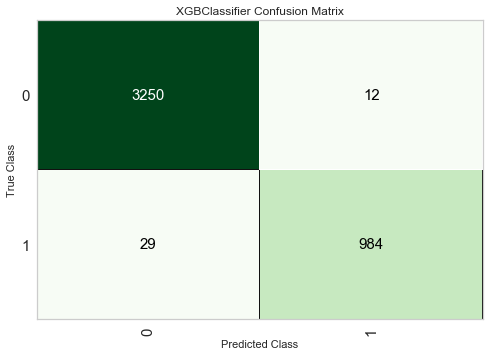

In [15]:
plot_model(tuned_bestModel,plot='confusion_matrix')

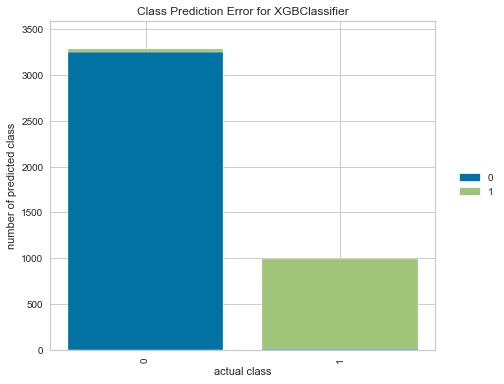

In [16]:
plot_model(tuned_bestModel,plot='error')

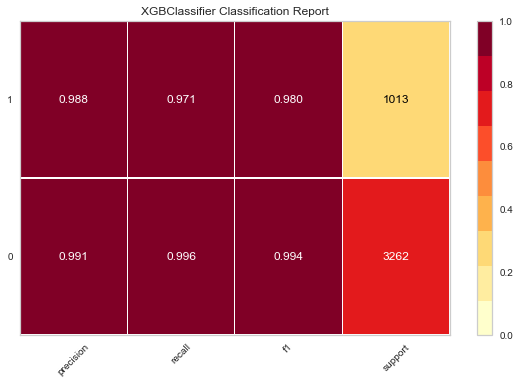

In [17]:
plot_model(tuned_bestModel,plot='class_report')

In [ ]:
plot_model(tuned_bestModel,plot='boundary')

In [ ]:
plot_model(tuned_bestModel,plot='learning')


In [ ]:
plot_model(tuned_bestModel,plot='manifold')


In [ ]:
plot_model(tuned_bestModel,plot='calibration')


## Interprétabilité et explicabilité


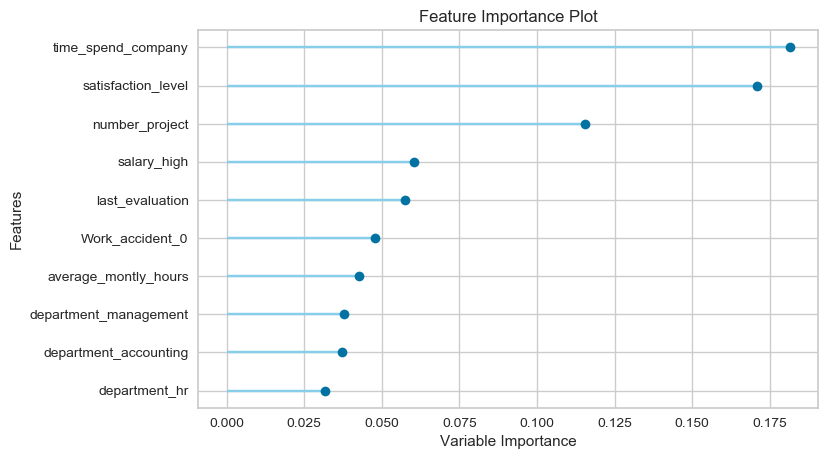

In [18]:
## Feature importance plot
plot_model(tuned_bestModel,plot='feature')

# Module 4 : Présentez votre solution

## Documentation
Documentez ce que vous avez fait

## Créez une belle présentation. 
* Assurez-vous de mettre en évidence la vue d’ensemble du probleme.
* Expliquez pourquoi votre solution atteint l'objectif commercial. 

## Apprentissage
* Présenter les points intéressants que vous avez remarqués en cours de route. 
* Décrivez ce qui a fonctionné et ce qui n'a pas fonctionné. 
* Énumérez vos hypothèses et les limites de votre système. 

## Communication / Blogging
Assurez-vous que vos principales constatations sont communiquées grâce à de belles visualisations ou à des conclusions faciles à retenir (par exemple, « le revenu médian est le prédicteur numéro un des prix des logements»).
### Blogging
Medium et Github

## Ressources
* [Advice for Better Blog Posts](https://www.fast.ai/2019/05/13/blogging-advice/)




# Module 5 : Produit Data (MVP)

## Conception 
À quoi ressemble votre produit minimum viable (MVP)? Incluez des croquis de votre produit.

## Cas d'utilisation 
Pour quelle persona concevez-vous? Pouvez-vous décrire les principaux cas d'utilisation au niveau épique (epic) auxquels vos produits s'adressent? Comment les utilisateurs accèderont-ils à ce produit?

## Roll-out
À quoi ressemble le plan de mise sur le marché?

## Ressources
* [Desigining great data products](https://www.oreilly.com/radar/drivetrain-approach-data-products/)
* [Data project checklist](https://www.fast.ai/2020/01/07/data-questionnaire/)
* [From Predictive Modelling to Optimization](https://www.youtube.com/watch?v=vYrWTDxoeGg&feature=emb_logo)


## POWER BI

In [19]:
## Exporter le dataset unseen comme data pour le pilote (MVP)

data_unseen.to_csv('data_unseen.csv', index=False)

# Module 6 : Évaluation et Déploiement

## Production
### Mise en place 
Préparez votre solution pour la production (connectez-la aux entrées de données de production, écrivez des tests unitaires, etc.).

### Surveillance
* Écrivez un code de surveillance pour vérifier les performances en direct de votre système à intervalles réguliers et déclencher des alertes en cas de chute. 
* Attention également à la dégradation lente: les modèles ont tendance à se dégrader à mesure que les données évoluent.
* La mesure des performances peut nécessiter un pipeline humain (par exemple via un service de crowdsourcing). 
* Surveillez également la qualité de vos entrées (par exemple, un capteur défectueux envoyant des valeurs aléatoires ou la sortie d’une autre équipe devenant obsolète). Ceci est particulièrement important pour les systèmes d'apprentissage en ligne. 
* Comment prévoyez-vous de surveiller ou d'atténuer les biais indésirables dans votre modèle?

## Concevoir pour la longévité
* Comment pourriez-vous améliorer votre produit à long terme? 
* En quoi les données du monde réel peuvent-elles être différentes des données d’entrainement? 
* Comment votre produit apprendra-t-il des nouvelles données? 
* Comment pourriez-vous utiliser les tests A / B pour améliorer votre produit?
* Réentraînez régulièrement vos modèles sur de nouvelles données (automatisez autant que possible).

## Ressources


In [20]:
## Finaliser le modele pour le deploiement
final_model = finalize_model(tuned_bestModel)

In [21]:

## Enregistrer le modele
save_model(tuned_bestModel, 'Modele_final_EmployeeTurnover_01092020')

Transformation Pipeline and Model Succesfully Saved


# Module 7 (optionnel) : Structurer et automatiser

## Structurer le code
### Writing code
### Versioning
### Testing
### OOP

## Data Ingineering (pipelines)

## Ressources



# Etapes suivantes

# Ressources.
## Ressources generales
* [Ressources en Data Science](https://www.uluumy.com/courses/ressources-en-data-science)

## Jupyter Notebook
* [Markdown quick reference cheat sheet](https://wordpress.com/support/markdown-quick-reference/)

## Versioning
* [How To Use GitHub with VS Code in 2020 | Commit & Push | Part 1](https://youtu.be/3Tn58KQvWtU)